In [8]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
from sklearn.ensemble import IsolationForest
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import warnings 
warnings.filterwarnings("ignore")

In [9]:
# Read pre-processed data
top_page_df = pd.read_csv('indian_covid_data.csv')
top_page_df = top_page_df.set_index('Date')

In [10]:
temp_df = top_page_df[2:]


In [11]:
temp_df.columns

Index(['S. No.', 'Region', 'Confirmed Cases', 'Active Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [12]:
temp_df.drop(columns=['S. No.'],inplace=True)

In [13]:
temp_df

,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
Date,,,,,
21/12/2015,India,34710628,87562.0,34146931.0,476135.0
12/3/2020,India,74,71.0,3.0,0.0
13/03/2020,India,75,71.0,3.0,1.0
14/03/2020,India,84,72.0,10.0,2.0
15/03/2020,India,107,95.0,10.0,2.0
...,...,...,...,...,...
21/02/2022,World,423575230,NaN,NaN,5883610.0
22/02/2022,World,424822073,NaN,NaN,5890312.0
24/02/2022,World,428511601,NaN,NaN,5911081.0


In [14]:
ind_df = temp_df[temp_df["Region"] == "India"]


In [15]:
copy_df=ind_df.copy()

In [16]:
copy_df

,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
Date,,,,,
21/12/2015,India,34710628,87562.0,34146931.0,476135.0
12/3/2020,India,74,71.0,3.0,0.0
13/03/2020,India,75,71.0,3.0,1.0
14/03/2020,India,84,72.0,10.0,2.0
15/03/2020,India,107,95.0,10.0,2.0
...,...,...,...,...,...
26/02/2022,India,42905844,121881.0,42270482.0,513481.0
27/02/2022,India,42916117,111426.0,42290921.0,513770.0
28/02/2022,India,42924130,102601.0,42307686.0,513843.0


In [17]:
ind_df.drop(columns=["Region"],inplace=True)

In [18]:
ind_df

,Confirmed Cases,Active Cases,Cured/Discharged,Death
Date,,,,
21/12/2015,34710628,87562.0,34146931.0,476135.0
12/3/2020,74,71.0,3.0,0.0
13/03/2020,75,71.0,3.0,1.0
14/03/2020,84,72.0,10.0,2.0
15/03/2020,107,95.0,10.0,2.0
...,...,...,...,...
26/02/2022,42905844,121881.0,42270482.0,513481.0
27/02/2022,42916117,111426.0,42290921.0,513770.0
28/02/2022,42924130,102601.0,42307686.0,513843.0


In [303]:
day = np.arange(len(ind_df))

In [304]:
ind_df['Day']=day

In [305]:
ind_df.drop(["21/12/2015"],inplace = True)

KeyError: "['21/12/2015'] not found in axis"

In [306]:
ind_df

,Confirmed Cases,Active Cases,Cured/Discharged,Death,Day
Day,,,,,
1,74,71.0,3.0,0.0,0
2,75,71.0,3.0,1.0,1
3,84,72.0,10.0,2.0,2
4,107,95.0,10.0,2.0,3
5,114,99.0,13.0,2.0,4
...,...,...,...,...,...
693,42905844,121881.0,42270482.0,513481.0,692
694,42916117,111426.0,42290921.0,513770.0,693
695,42924130,102601.0,42307686.0,513843.0,694


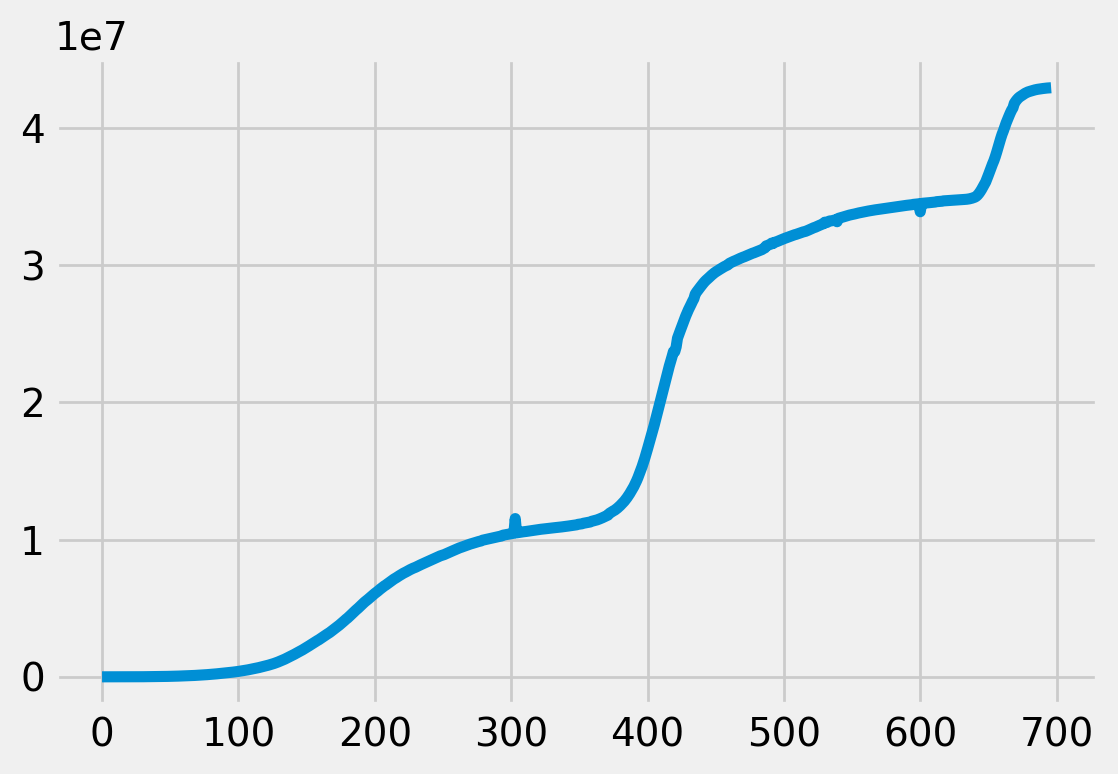

In [307]:
plt.plot(ind_df["Day"],ind_df["Confirmed Cases"])

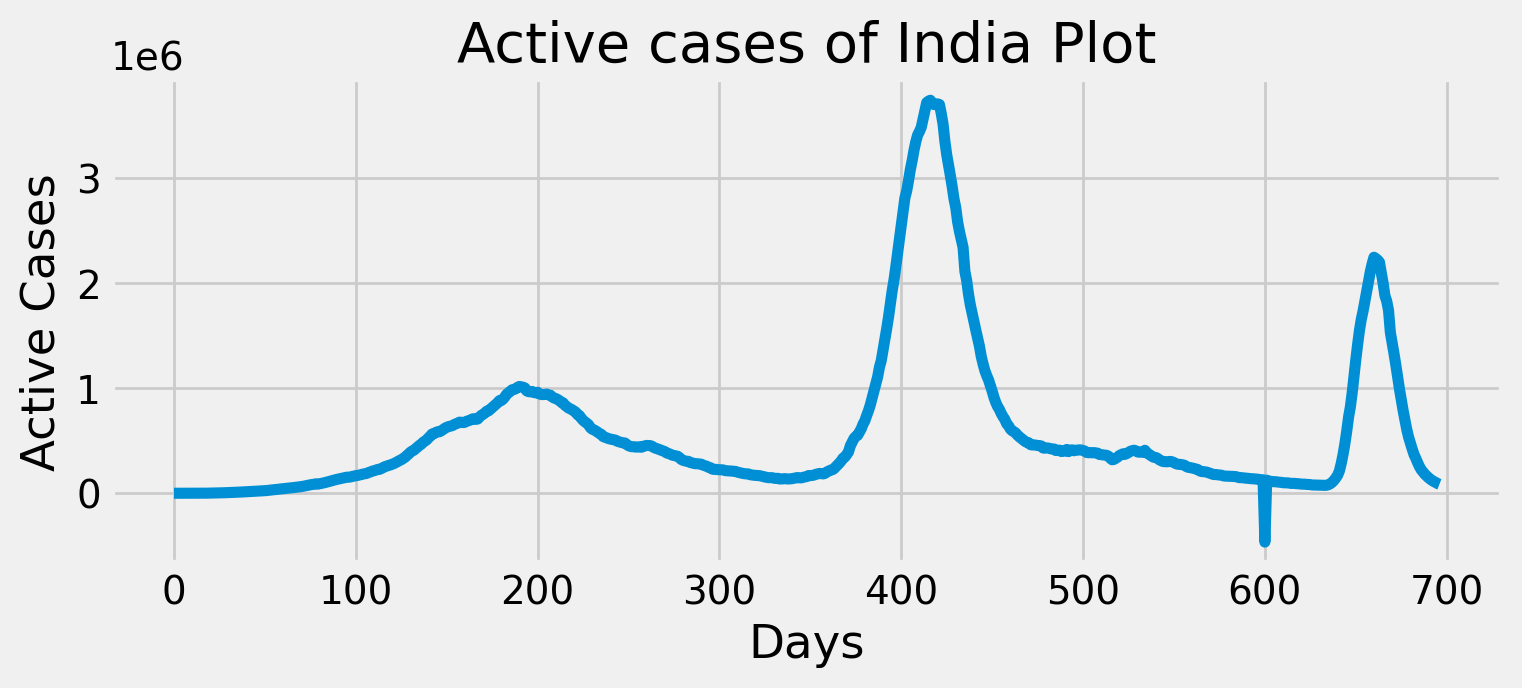

In [325]:

plt.figure(figsize=(8,3))
plt.title("Active cases of India Plot")
plt.xlabel("Days")
plt.ylabel("Active Cases")
plt.plot(ind_df["Day"],ind_df["Active Cases"])


# f= plt.figure()
# f.set_figwidth(4)
# f.set_figheight(10)


In [26]:
ind_df.columns

Index(['Confirmed Cases', 'Active Cases', 'Cured/Discharged', 'Death', 'Day'], dtype='object')

In [27]:
ind_df.set_index("Day",inplace=True)

In [28]:
ind_df

,Confirmed Cases,Active Cases,Cured/Discharged,Death
Day,,,,
1,74,71.0,3.0,0.0
2,75,71.0,3.0,1.0
3,84,72.0,10.0,2.0
4,107,95.0,10.0,2.0
5,114,99.0,13.0,2.0
...,...,...,...,...
693,42905844,121881.0,42270482.0,513481.0
694,42916117,111426.0,42290921.0,513770.0
695,42924130,102601.0,42307686.0,513843.0


In [29]:
conf_case=ind_df['Confirmed Cases']
active_case =ind_df['Active Cases']
cure_case = ind_df['Cured/Discharged']
death_case = ind_df['Death']



In [30]:
import random
conf_case_pred = conf_case;
for i in range(len(conf_case)):
    if(i%2 ==0):
        conf_case_pred + 1e7;
    else:
        conf_case_pred - 1e7;
    

<AxesSubplot:xlabel='Day'>

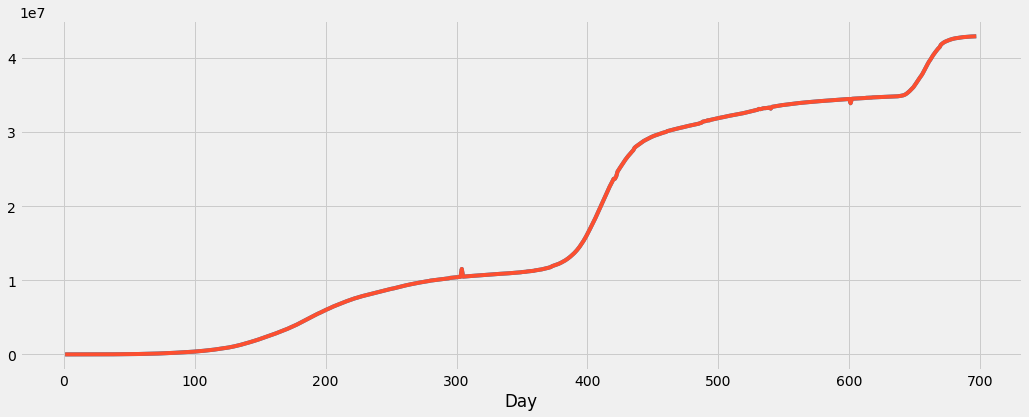

In [31]:
ax=conf_case.plot(figsize=(16,6))
conf_case_pred.plot(ax=ax ,figsize=(16,6))


In [32]:
ax=conf_case.plot(figsize=(16,6))
active_case.plot(ax=ax,figsize=(16,6))
cure_case.plot(ax=ax,figsize=(16,6))b
death_case.plot(ax=ax,figsize=(16,6))
plt.legend(["confirmed case","active case","cure case","death case"])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (Temp/ipykernel_35500/2499755228.py, line 3)

In [33]:
ind_df.corr()

,Confirmed Cases,Active Cases,Cured/Discharged,Death
Confirmed Cases,1.000000,0.180624,0.998646,0.995224
Active Cases,0.180624,1.000000,0.129224,0.117769
Cured/Discharged,0.998646,0.129224,1.000000,0.997083
Death,0.995224,0.117769,0.997083,1.000000


In [34]:
active_case


Day
1          71.0
2          71.0
3          72.0
4          95.0
5          99.0
         ...   
693    121881.0
694    111426.0
695    102601.0
696     92344.0
697     85680.0
Name: Active Cases, Length: 697, dtype: float64

In [181]:
from sklearn.model_selection import train_test_split
#Appyling dwt on active cases data 
X = np.arange(len(ind_df))
X= X.reshape(-1,1)
y = active_case
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [92]:
y_train

Day
1          71.0
2          71.0
3          72.0
4          95.0
5          99.0
         ...   
553    277020.0
554    275224.0
555    273889.0
556    270557.0
557    264458.0
Name: Active Cases, Length: 557, dtype: float64

In [65]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import svm
import statsmodels.api as sm
import pywt
import copy
import warnings
from statsmodels.tsa.arima_model import ARMA
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score


def WT(index_list, wavefunc='db4', lv=4, m=1, n=4, plot=False,label="active"):
    
    '''
    WT: Wavelet Transformation Function
    index_list: Input Sequence;
    lv: Decomposing Level；
    wavefunc: Function of Wavelet, 'db4' default；
    m, n: Level of Threshold Processing
    '''
    # Decomposing 
    coeff = pywt.wavedec(index_list,wavefunc,mode='sym',level=lv)   #  Decomposing by levels，cD is the details coefficient
    sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0 # sgn function 

    # Denoising
    # Soft Threshold Processing Method
    for i in range(m,n+1):   #  Select m~n Levels of the wavelet coefficients，and no need to dispose the cA coefficients(approximation coefficients)
        cD = coeff[i]
        Tr = np.sqrt(2*np.log2(len(cD)))  # Compute Threshold
        for j in range(len(cD)):
            if cD[j] >= Tr:
                coeff[i][j] = sgn(cD[j]) * (np.abs(cD[j]) -  Tr)  # Shrink to zero
            else:
                coeff[i][j] = 0   # Set to zero if smaller than threshold

    # Reconstructing
    coeffs = {}
    for i in range(len(coeff)):
        coeffs[i] = copy.deepcopy(coeff)
        for j in range(len(coeff)):
            if j != i:
                coeffs[i][j] = np.zeros_like(coeff[j])
    
    for i in range(len(coeff)):
        coeff[i] = pywt.waverec(coeffs[i], wavefunc)
        if len(coeff[i]) > len(index_list):
            coeff[i] = coeff[i][:-1]
        
    if plot:     
        denoised_index = np.sum(coeff, axis=0)   
        data = pd.DataFrame({label: index_list, 'denoised': denoised_index})
        data.plot(figsize=(10,10),subplots=(2,1))
        data.plot(figsize=(10,5))
   
    return coeff

def AR_MA(coeff):
    
    '''
    AR_MA:  Autoregressive Moving Average Function
    
    coeff:  Input sequence disposed by WT (Wavelet Transformation Function)
    
    '''
    
    warnings.filterwarnings('ignore')
    order, model, results = [], [], []

    for i in range(1, len(coeff)):
        order.append(sm.tsa.arma_order_select_ic(coeff[i], ic='aic')['aic_min_order'])   # Select (p, q) by AIC criterion 
        model.append(ARIMA(coeff[i], order=(order[i-1])))
    
    for i in range(len(model)):
        new_order = list(order[i])
        while True:
            try:
                results.append(model[i].fit())
                
            except ValueError:                                              # Further determinte the appropriate (p, q) for the model
                new_order[1] = np.max((0, new_order[1]-1))
                model[i] = ARMA(coeff[i+1], order=new_order)         

            if len(results)>= i+1:
                break                
    
    return results

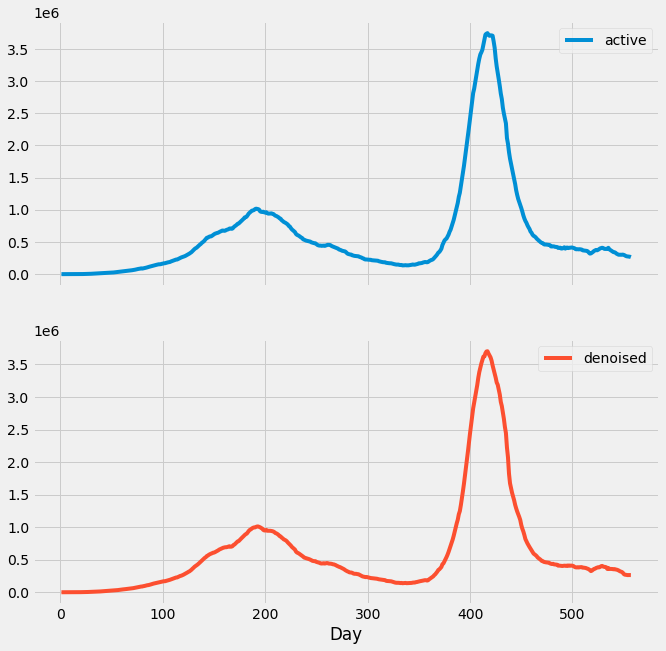

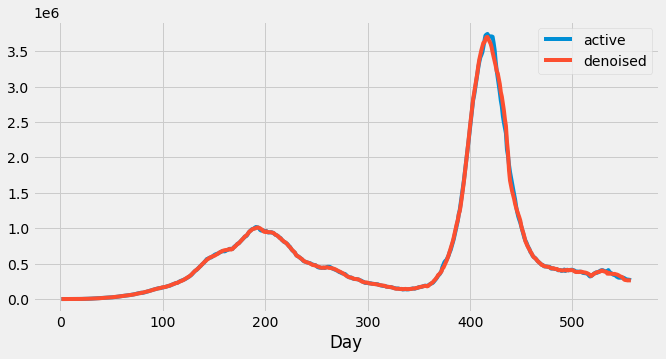

In [93]:
 coeff = WT(y_train,plot=True)

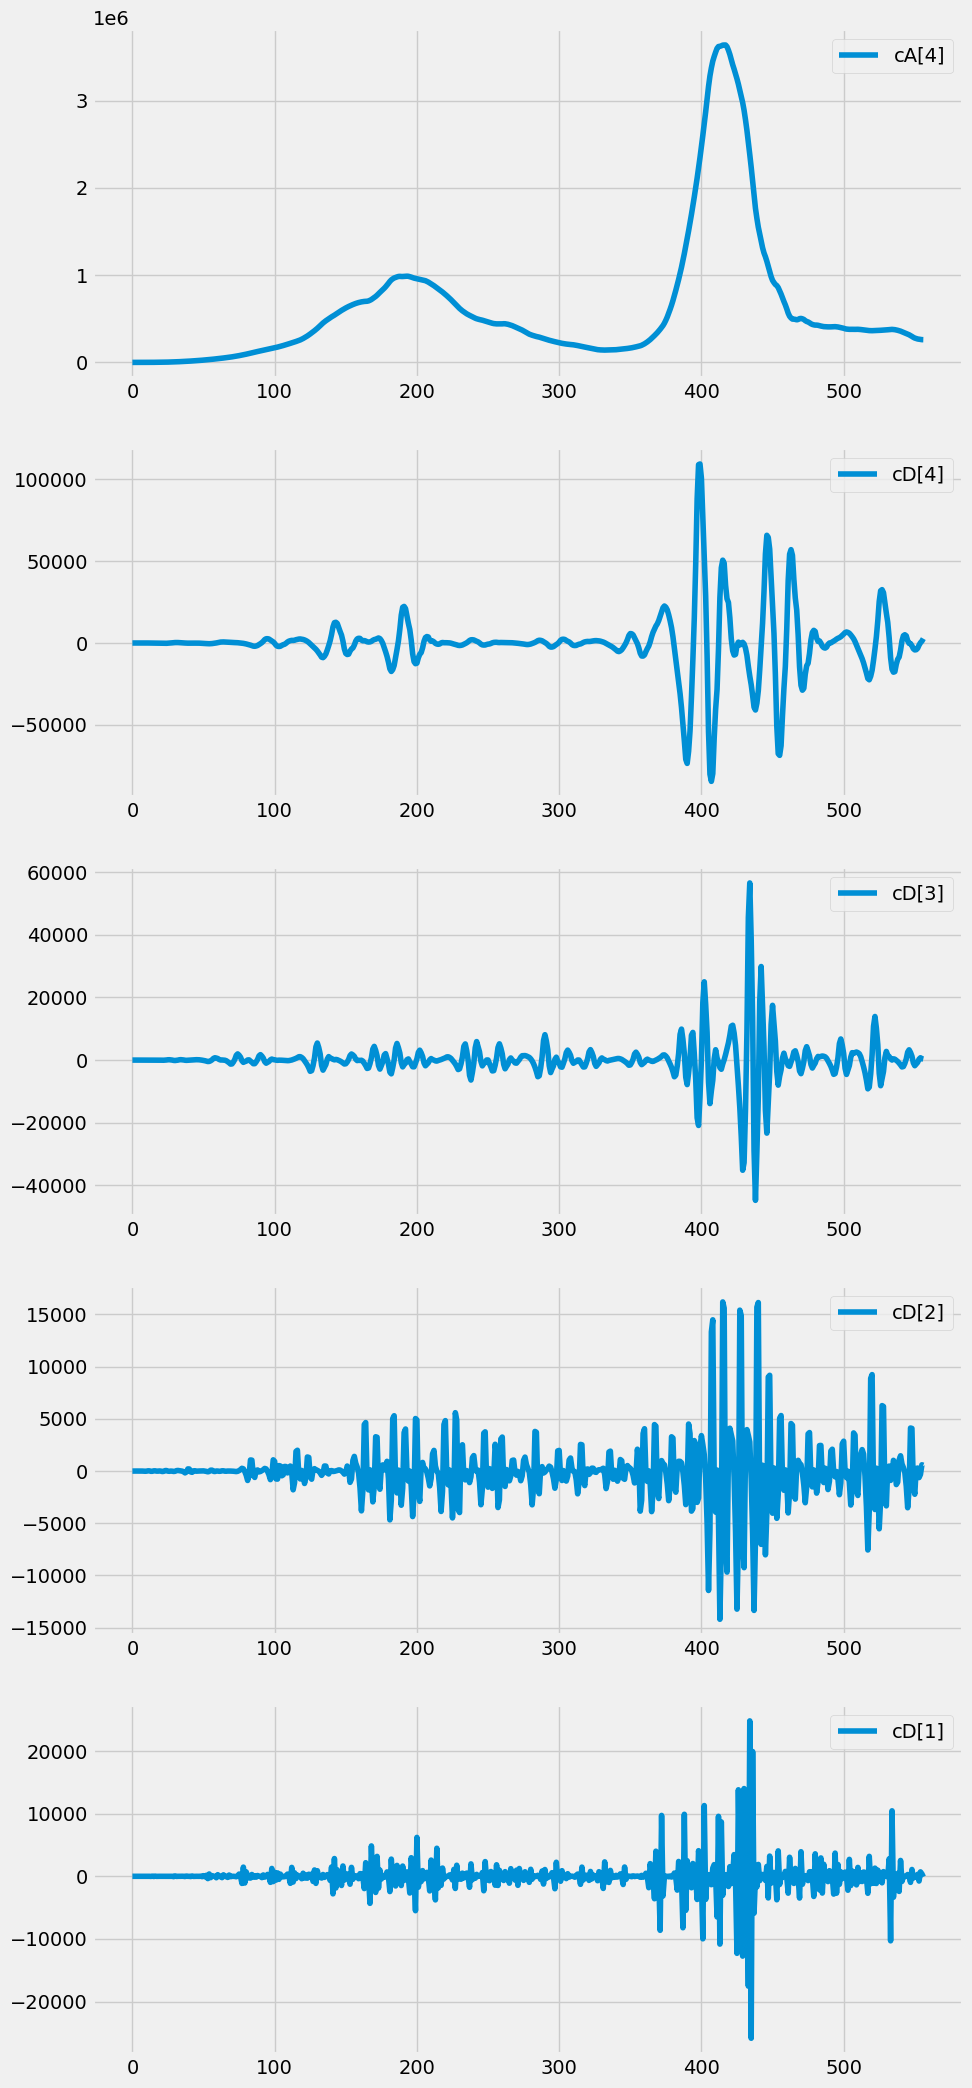

<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

In [398]:

fig, ax =  plt.subplots(len(coeff), 1, figsize=(10, 25))
f=0
plt.rcParams['figure.dpi'] = 75
for i in range(len(coeff)):
    if i == 0:
        plt.figure(figsize=(20,10))
        ax[i].plot(coeff[i], label = 'cA[%.0f]'%(len(coeff)-i-1))
        ax[i].legend(loc = 'best')
    else:
        plt.figure(figsize=(20,10))
        ax[i].plot(coeff[i], label = 'cD[%.0f]'%(len(coeff)-i))
        ax[i].legend(loc = 'best')

In [68]:
len(coeff)

5

In [69]:
from statsmodels.tsa.stattools import adfuller,kpss

In [70]:
for i in range(1, len(coeff)):
    dftest = adfuller(coeff[i], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Adfuller Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value(%s)' % key] = value
    print((pd.DataFrame(dfoutput, columns=['cD[%.0f]'%(len(coeff)-i)])))
    print('\n')
    kpsstest = kpss(coeff[i])
    dfoutput = pd.Series(kpsstest[0:3], index=['Kpss Statistic', 'p-value', '#Lags Used' ])
    for key, value in kpsstest[3].items():
        dfoutput['Critical value(%s)' % key] = value
    print((pd.DataFrame(dfoutput, columns=['cD[%.0f]'%(len(coeff)-i)])))
    print('___________________________________________________________________________')

                                    cD[4]
Adfuller Statistic          -1.042478e+01
p-value                      1.668683e-18
#Lags Used                   1.900000e+01
Number of observations Used  5.370000e+02
Critical value(1%)          -3.442586e+00
Critical value(5%)          -2.866937e+00
Critical value(10%)         -2.569645e+00


                          cD[4]
Kpss Statistic         0.009838
p-value                0.100000
#Lags Used            13.000000
Critical value(10%)    0.347000
Critical value(5%)     0.463000
Critical value(2.5%)   0.574000
Critical value(1%)     0.739000
___________________________________________________________________________
                                    cD[3]
Adfuller Statistic          -7.296896e+00
p-value                      1.370463e-10
#Lags Used                   1.900000e+01
Number of observations Used  5.370000e+02
Critical value(1%)          -3.442586e+00
Critical value(5%)          -2.866937e+00
Critical value(10%)         -2.56964

In [71]:
from statsmodels.tsa.arima.model import ARIMA
alphavalues =[];
parameter =[];

In [72]:
coeff[0].shape

(557,)

In [73]:
def AR_MA(coeff,diff=1):
    
    '''
    AR_MA:  Autoregressive Moving Average Function
    
    coeff:  Input sequence disposed by WT (Wavelet Transformation Function)
    
    '''
    
    warnings.filterwarnings('ignore')
    order, model, results = [], [], []

    for i in range(1, len(coeff)):
        order.append(sm.tsa.arma_order_select_ic(coeff[i], ic='aic')['aic_min_order'])   # Select (p, q) by AIC criterion 
        p,q=order[i-1]
        alphavalues.append(p+diff+q);
        parameter.append([p,diff,q]);
        model.append(ARIMA(coeff[i], order=(p,diff,q)));
    
    for i in range(len(model)):
        new_order = list(order[i])
        while True:
            try:
                results.append(model[i].fit())
                
            except ValueError:                                              # Further determinte the appropriate (p, q) for the model
                new_order[1] = np.max((0, new_order[1]-1))
                model[i] = ARMA(coeff[i+1], order=new_order)         

            if len(results)>= i+1:
                break                
    
    return results

In [74]:
results = AR_MA(coeff)

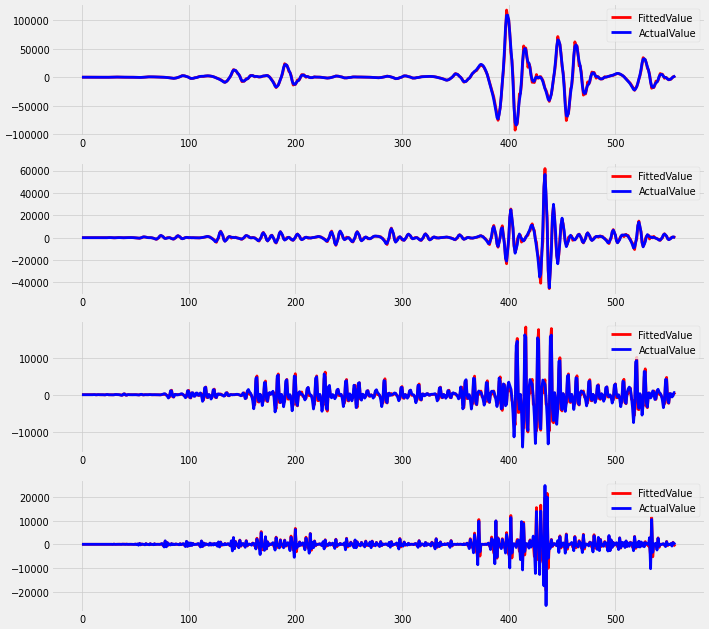

In [347]:
plt.figure(figsize=(15,15))
plt.title("Applying ARIMA model on Cd terms")
for i in range(len(results)):

    plt.subplot(len(results), 1, i+1)
    plt.plot(results[i].fittedvalues, 'red', label='FittedValue')
    plt.legend(loc='upper right')
    plt.plot(coeff[i+1], 'blue', label='ActualValue')
    plt.legend(loc='upper right')
    

In [169]:
alphavalues=[];
parameter=[];
results = AR_MA(coeff)

In [51]:
parameter

[[3, 1, 2], [4, 1, 2], [4, 1, 2], [1, 1, 2]]

In [52]:
#alphavalues
Neff=[];
Ntr = len(list(y_train))
Nts = len(list(y_test))
for i in range(len(results)):
    Neff.append(Ntr-alphavalues[i])
Neff
# print(alphavalues[0])

[551, 550, 550, 553]

In [53]:
yeff =[];
for i in range(1,5):
    yeff.append(coeff[i][alphavalues[i-1]  : Ntr]);
len(yeff)


4

In [56]:
maxlen = np.max(np.array(Neff))
R = np.zeros(maxlen)
Ylplin = np.zeros(Nts)

In [57]:
print(len(R))
print(len(Ylplin))

553
140


In [ ]:

for i in range(len(results)):
   
    Yl = np.zeros(Ntr+Nts)
    Ylp = np.zeros(Neff[i] + Nts)
    Yl[0:Ntr] = coeff[0+i][0:Ntr];
    for k in range(0,Neff[i]+Nts):
        if alphavalues[i]+k-1 > Yl.shape[0]:
            break
        modelx = ARIMA(Yl[k:alphavalues[i]+k-1], order=(parameter[i][0], parameter[i][1], parameter[i][2]),enforce_stationarity=False); 
        fitted = modelx.fit()
        Ylp [k] = fitted.forecast(steps=1)
        if (k < Neff[i]):
            R[k] += (yeff[i][k] - Ylp[k]);
        if ( k >=Neff[i]):
            Yl[k+alphavalues[i]] = Ylp[k];
    plt.plot(Ylp)
#     print(Yl)
    Ylplin += Ylp[Neff[i]:]; 

# for i in range(len(results)):
#     Ylp=(results[i].forecast(steps=Neff[i]+Nts))

# for i in Ylp:
#     Ylplin += np.array(Ylp[i])

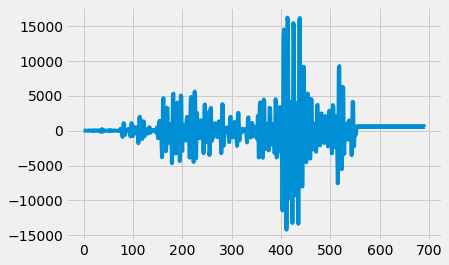

In [157]:
plt.plot(Ylp)

Text(0.5, 1.0, 'Linear part prediction')

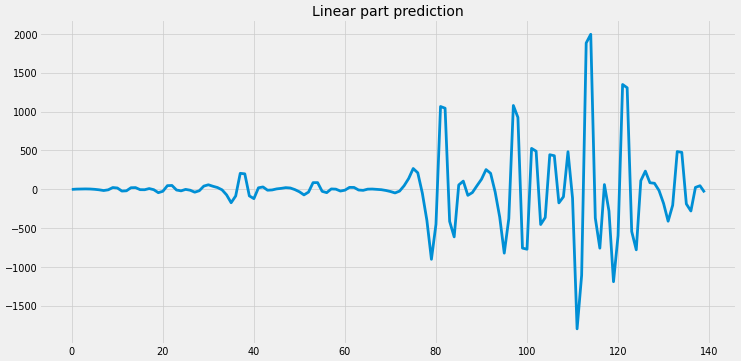

In [351]:
y_pred_linear = Ylp[:y_test.shape[0]]
plt.figure(figsize=(16,8))
plt.plot(Ylp[:y_test.shape[0]])
plt.title("Linear part prediction")

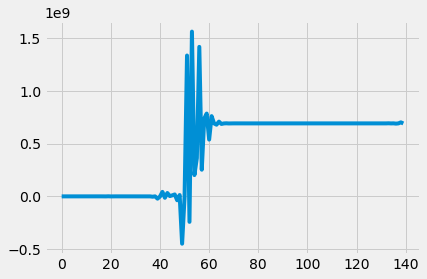

In [156]:
plt.plot(Ylplin)

In [590]:
Ylplin[0:10]

array([ 204412.86463088,  378623.66620926,  585167.71483034,
       -841830.13103833,  753955.08478798, 3718098.11254681,
       -451349.10723174, 3511377.18933566,  703453.70304031,
       1208895.40110874])

In [591]:
# reff;
# for i in range(len(results)):
#     r =(coeff[i+1]-results[i].fittedvalues);
#     if (i==0):
#         reff= np.array(r);
#     else:
#         reff =np.add(reff,np.array(r));
    

In [592]:
# for k in range(1,Neff[0]+ Nts):
#     Ylp = results[0]

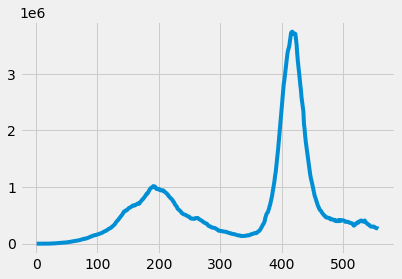

In [182]:
plt.plot(y_train)

In [183]:
print(y_train.shape)
print(y_train_new.shape)
print(results[0].fittedvalues.shape)

(557,)
(557, 1)
(557,)


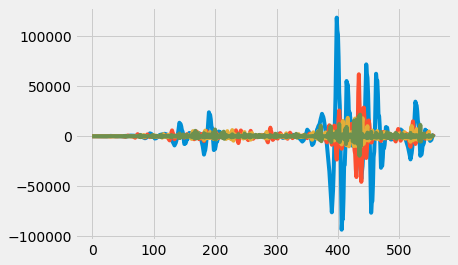

In [185]:
y_train_new = np.array(y_train).reshape(-1, 1)
# y_pred_lin = np.zeros_like(results[0].fittedvalues)
for i in range(len(results)):
    plt.plot(results[i].fittedvalues)
    y_train_new -= np.array(results[i].fittedvalues.reshape(-1, 1))
#     y_pred_lin += np.array(results[i].fittedvalues)

In [163]:
# plt.plot(y_pred_lin)

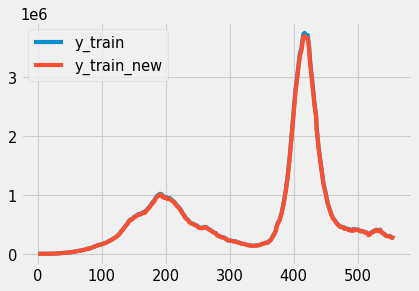

In [356]:

plt.rcParams['figure.dpi'] = 75

plt.plot(y_train)
plt.plot(y_train_new)
plt.legend(["y_train","y_train_new"])

In [189]:
# plt.plot(y_train_new.reshape(-1) - y_train.reshape(-1))

In [106]:
# plt.plot(y_train[100:102])
# plt.plot(y_train_new[100:102])

In [190]:
def NonlinReg(coeff, regressor='GBR', features=4, interval=0, length=1):
    '''
    NonlinReg: Non-linear Regression Model
    coeff: Input sequence disposed by WT (Wavelet Transformation Function)
    regressor: Non-linear regressor, 'GBR' default
    features: Days used to predict, 4 default
    interval: Prediction lagging, 0 default
    length: 1 default
    '''
    X, Y = [], []
    for i in range(len(coeff[0])):
        if i+features+interval < len(coeff[0]):
            X.append(coeff[0][i:i+features])
            Y.append(coeff[0][i+features+interval])
    X =  np.array(X)
    Y =  np.array(Y)

    if regressor == 'GBR':
        gbr = GBR(learning_rate=0.1, n_estimators=80, max_depth=2).fit(X, Y)
        
        X_ = copy.deepcopy(X)
        Y_ = copy.deepcopy(Y)
        print(X_,type(X_))
        print(Y_,type(Y_))
        print(gbr.predict(X_[-1].reshape(1,-1)),gbr.predict(X_[-1].reshape(1,-1)).shape)
        for i in range(length):
            X_ = np.concatenate((X_, np.array([np.concatenate((X_[-1][-features+1:], Y_[[-interval-1]]))])))
            Y_ = np.concatenate((Y_, gbr.predict(X_[-1].reshape(1,-1))))
    
    if regressor == 'SVR':
        svr = svm.SVR(kernel='rbf', C=100, gamma=3).fit(X, Y)

        X_ = copy.deepcopy(X)
        Y_ = copy.deepcopy(Y)
        for i in range(length):
            X_ = np.concatenate((X_, np.array([np.concatenate((X_[-1][-features+1:], Y_[[-interval-1]]))])))
            Y_ = np.concatenate((Y_, svr.predict(X_[-1])))
    
    return Y_
def ModelEvaluation(index_predict, index_real, model_name='model'): 
    
    '''
    ModelEvaluation: The function used to evaluate prediction model
    
    index_predict: The predict sequence
    
    index_real: The actual sequence 
    
    modelname: For the displaying convenience, the name of index
    
    '''
    model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # The evaluation model list
    model_metrics_list = []  # The evaluation indicatiors list
    for m in model_metrics_name:  
        tmp_score = m(index_predict, index_real)  # compute each result
        model_metrics_list.append(tmp_score)
    df = pd.DataFrame(np.array([model_metrics_list]), index=[model_name], columns=['ev', 'mae', 'mse', 'r2'])    
    return df

In [191]:
# features = 4  
# forward =30
# window = 150 # the rolling window should be as large as possible. Better larger than 100, since the time series ARMA model can't get inverted matrics if the time series is too short 
# length = 1
# index_predict, index_real = [], []
# for i in range(forward):
#     test_window = y_train[i:i+window]
#     coeff = WT(test_window, lv=4, n=4)
#     results = AR_MA(coeff)
#     Y_ = NonlinReg(coeff, regressor='GBR', length=length, features = features)[-1:]
#     D_series = []
#     for j in range(len(results)):
#         D_series.append(results[j].predict(window, window+length-1, dynamic=True))
#     index_predict.append(Y_)
#     index_real.append(y_train[i+window:i+window+length].values)
    

In [192]:
y_train

Day
1          71.0
2          71.0
3          72.0
4          95.0
5          99.0
         ...   
553    277020.0
554    275224.0
555    273889.0
556    270557.0
557    264458.0
Name: Active Cases, Length: 557, dtype: float64

In [193]:
# Yn = np.zeros(maxlen+Nts)
# # for i in range(1,5):
# #     y_train = ytrain- coeff[i];
# alphamin = np.min(np.array(alphavalues))
# y_train = R# +np.array(coeff[0][alphamin :])

In [194]:
# for i in range(len(results)):
#     y_train -= results[i];

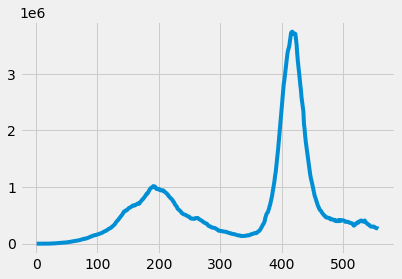

In [195]:
plt.plot(y_train)

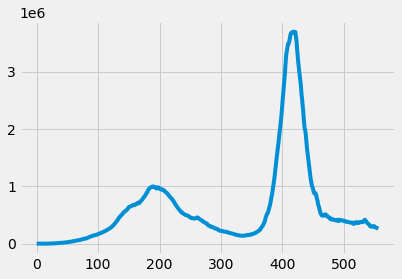

In [196]:
plt.plot(y_train_new)

In [281]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Flatten, Layer, ConvLSTM2D, Bidirectional
from keras.layers import Dropout, LayerNormalization, MultiHeadAttention, Add
from keras.layers import LSTM, RNN, Embedding, TimeDistributed, Activation, GRU
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
from keras import backend

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),initializer="zeros")        
        super(Attention,self).build(input_shape)
        
    def call(self, x):        
        e = backend.tanh(backend.dot(x,self.W)+self.b)
        a = backend.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
          
        return backend.sum(output, axis=1)

    def get_config(self):
        config = super().get_config().copy()
        config.update({'return_sequences': self.return_sequences})
        return config
      
def Bi_LSTM(shape):
    model = Sequential()
    model.add(tf.keras.layers.Reshape((shape[0], shape[1]) ,input_shape=(shape[0], shape[1])))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Dropout(0.25))   
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.25))
    #model.add(Attention(return_sequences=False))
    
    model.add(Flatten())
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('linear'))
    return(model)

def Bi_LSTM_Attn(shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(512,input_shape=(shape[0], shape[1]), return_sequences=True)))
    model.add(Dropout(0.25))   
    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.25))
    model.add(Attention(return_sequences=False))    
    model.add(Flatten())
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('linear'))
    return(model)

def GRU_x(shape):
    model = Sequential()
    model.add(GRU(512,input_shape=(shape[0], shape[1]), return_sequences=True))
    model.add(Dropout(0.25))   
    model.add(GRU(256))
    model.add(Dropout(0.25))
    #model.add(Attention(return_sequences=False))
    
    model.add(Flatten())
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('linear'))
    return(model)

def LSTM_x(shape):
    model = Sequential()
    model.add(LSTM(512,input_shape=(shape[0], shape[1]), return_sequences=True))
    model.add(Dropout(0.25))   
    model.add(LSTM(256))
    model.add(Dropout(0.25))
    #model.add(Attention(return_sequences=False))
    
    model.add(Flatten())
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('linear'))
    return(model)

def LSTM_Attn(shape):
    model = Sequential()
    model.add(LSTM(512,input_shape=(shape[0], shape[1]), return_sequences=True))
    model.add(Dropout(0.25))   
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(Attention(return_sequences=False))
    
    model.add(Flatten())
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('linear'))
    return(model) 

def CNN_x(shape):
    model = Sequential()
    model.add(Conv2D(kernel_size=(3,3), filters=32, padding='same',data_format = 'channels_last', activation='swish',input_shape=(shape[0], shape[1], shape[2])))
    model.add(Conv2D(kernel_size=(3,3), filters=32, padding='same', activation='swish'))
    model.add(Dropout(0.15))
    #model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(kernel_size=(3,3), filters=64, padding='same',  activation='swish'))
    model.add(Conv2D(kernel_size=(3,3), filters=64, padding='same',  activation='swish'))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same',  activation='swish'))
    model.add(Conv2D(kernel_size=(3,3), filters=128, padding='same',  activation='swish'))
    model.add(Dropout(0.15))
    #model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same',  activation='swish'))
    model.add(Conv2D(kernel_size=(3,3), filters=256, padding='same',  activation='swish'))
    model.add(Dropout(0.15))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('linear'))

    return(model)
  
def CNN_LSTM(shape):
    model = Sequential()
    model.add(tf.keras.layers.Reshape((-1, shape[1], shape[2]) ,input_shape=(shape[1], shape[2])))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='swish', padding='same'), input_shape=(None,shape[1],shape[2])))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='swish', padding='same')))
    #model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='swish', padding='same')))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='swish', padding='same')))
    #model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='swish', padding='same')))
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='swish', padding='same')))
    #model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='swish', padding='same')))
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='swish', padding='same')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Flatten()))
    #model.add(Flatten())
    model.add(LSTM(256))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='swish'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='swish'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='swish'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))
    return(model)
  
def Conv_LSTM(shape):
    model = Sequential()
    model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), activation='swish', input_shape=shape,padding='same', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), activation='swish', padding='same', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 1000,  activation='swish'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('linear'))
    return(model)

In [282]:
# y_train = np.array(y_train)
# y_train = (y_train-min(y_train))/(max(y_train) - min(y_train))
# y_train = y_train.reshape(-1,1)
# print(y_train.shape)

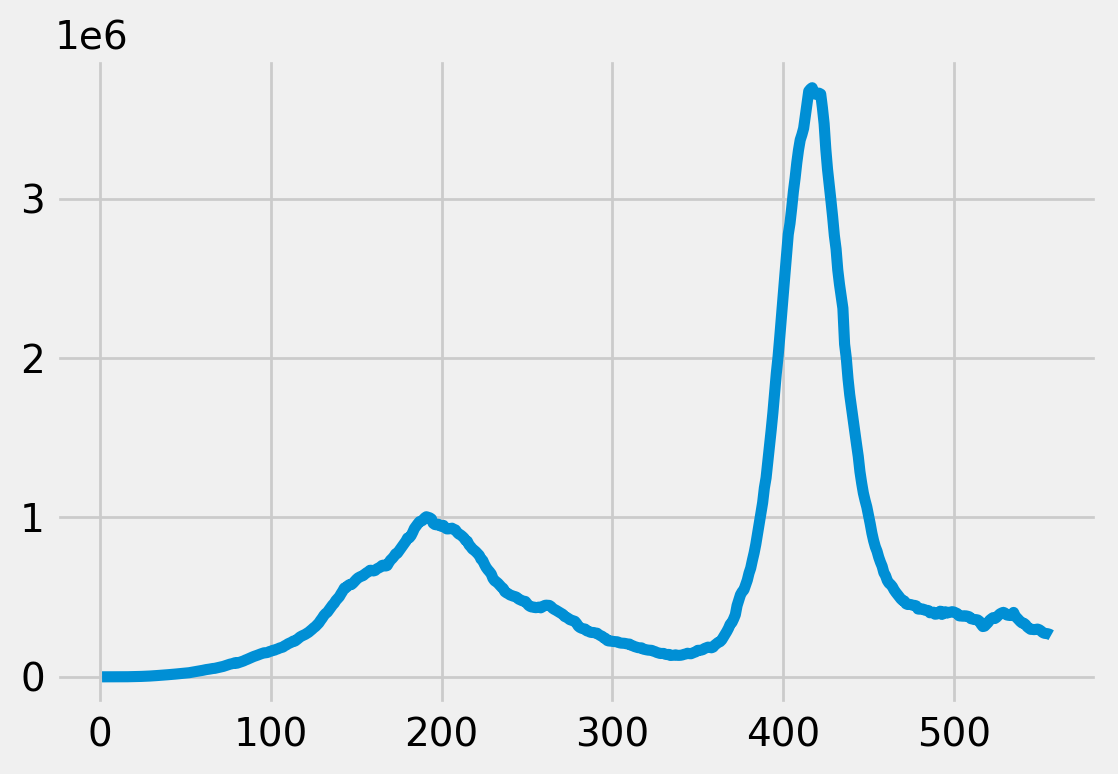

In [283]:

y_train_new = (y_train - min(y_train_new))/(max(y_train_new) - min(y_train_new))
plt.plot(y_train_new)

In [199]:
y_test_x = np.array(y_test)
# print(y_test_x)
y_test_x = (y_test_x-min(y_test))/(max(y_test) - min(y_test))
# y_test_x = y_test_x.reshape(-1,1)
# print(y_test_x)
# y_test_x = np.concatenate([y_train[-100:].reshape(-1), y_test_x])
y_test_x =  y_test_x.reshape(-1, 1)


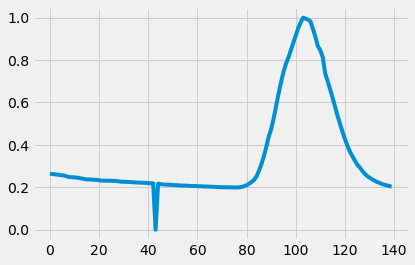

In [200]:
plt.plot(y_test_x)

In [201]:
# plt.plot(y_test_x)
# # plt.plot(y_train[-100:])

In [202]:
print(y_train[-100:].reshape(-1).shape)
print(y_test_x.shape)

AttributeError: 'Series' object has no attribute 'reshape'

In [268]:
window_size = 50
from keras.preprocessing.sequence import TimeseriesGenerator
t_generator = TimeseriesGenerator(y_train_new, y_train_new, window_size, batch_size=64)

In [204]:
len(y_test)

140

In [205]:
test_generator = TimeseriesGenerator(y_test_x, y_test_x, window_size, batch_size=64)

In [291]:
plt.rcParams['figure.dpi'] = 200

def mse_metric(a, b, name):

  plt.figure(figsize=(10 , 5))
  plt.xlabel("Days->")
  plt.ylabel("COVID cases->")

  plt.plot(a)
  plt.plot(b, '--')
  plt.savefig(str(name+".jpeg"))

  b = (b - min(a))/(max(a)-min(a))
  a = (a - min(a))/(max(a)-min(a))

  loss = 0
  for i in range(0, a.shape[0]):
    loss = loss + (a[i]-b[i])**2
  loss = loss / a.shape[0]
  
  plt.legend(["actual data", name])
  return loss

In [294]:
cnt = 0
history = {}
y_predicted_models = {}
evaluation_dict = {}

loss_dict = {}
dict_models = {"LSTM":LSTM_x(shape =[window_size,1]), "GRU":GRU_x(shape=[window_size, 1]), "CNN + LSTM":CNN_LSTM(shape =[None, window_size,1]), "Bi-directional LSTM":Bi_LSTM(shape=[window_size, 1])}
for name, model in dict_models.items():
    model.compile(optimizer = "adam",loss= "mse")
    
    print(name)
                                                                  
    history[name] = model.fit(t_generator,verbose=1, epochs = 50)

LSTM
Epoch 1/50
8/8 [==============================] - 8s 635ms/step - loss: 0.0585
Epoch 2/50
8/8 [==============================] - 5s 621ms/step - loss: 0.0419
Epoch 3/50
8/8 [==============================] - 5s 646ms/step - loss: 0.0106
Epoch 4/50
8/8 [==============================] - 5s 661ms/step - loss: 0.0460
Epoch 5/50
8/8 [==============================] - 5s 639ms/step - loss: 0.0065
Epoch 6/50
8/8 [==============================] - 5s 629ms/step - loss: 0.0320
Epoch 7/50
8/8 [==============================] - 5s 649ms/step - loss: 0.0471
Epoch 8/50
8/8 [==============================] - 5s 677ms/step - loss: 0.0300
Epoch 9/50
8/8 [==============================] - 6s 708ms/step - loss: 0.0226
Epoch 10/50
8/8 [==============================] - 5s 673ms/step - loss: 0.0428
Epoch 11/50
8/8 [==============================] - 5s 648ms/step - loss: 0.0413
Epoch 12/50
8/8 [==============================] - 5s 639ms/step - loss: 0.0194
Epoch 13/50
8/8 [===========================

8/8 [==============================] - 1s 143ms/step - loss: 0.0564
Epoch 3/50
8/8 [==============================] - 1s 135ms/step - loss: 0.0514
Epoch 4/50
8/8 [==============================] - 1s 139ms/step - loss: 0.0570
Epoch 5/50
8/8 [==============================] - 1s 131ms/step - loss: 0.0581
Epoch 6/50
8/8 [==============================] - 1s 132ms/step - loss: 0.0534
Epoch 7/50
8/8 [==============================] - 1s 134ms/step - loss: 0.0543
Epoch 8/50
8/8 [==============================] - 1s 129ms/step - loss: 0.0518
Epoch 9/50
8/8 [==============================] - 1s 130ms/step - loss: 0.0570
Epoch 10/50
8/8 [==============================] - 1s 129ms/step - loss: 0.0477
Epoch 11/50
8/8 [==============================] - 1s 141ms/step - loss: 0.0512
Epoch 12/50
8/8 [==============================] - 1s 129ms/step - loss: 0.0453
Epoch 13/50
8/8 [==============================] - 1s 128ms/step - loss: 0.0543
Epoch 14/50
8/8 [==============================] - 1s 132ms

LSTM
            ev       mae       mse        r2
LSTM  0.924034  0.159425  0.030169  0.744452
GRU
           ev       mae       mse        r2
GRU  0.930852  0.151469  0.027861  0.759681
CNN + LSTM
                  ev       mae       mse        r2
CNN + LSTM -0.915657  0.235666  0.111849 -1.381381
Bi-directional LSTM
                           ev       mae       mse        r2
Bi-directional LSTM  0.927943  0.156867  0.029434  0.749795


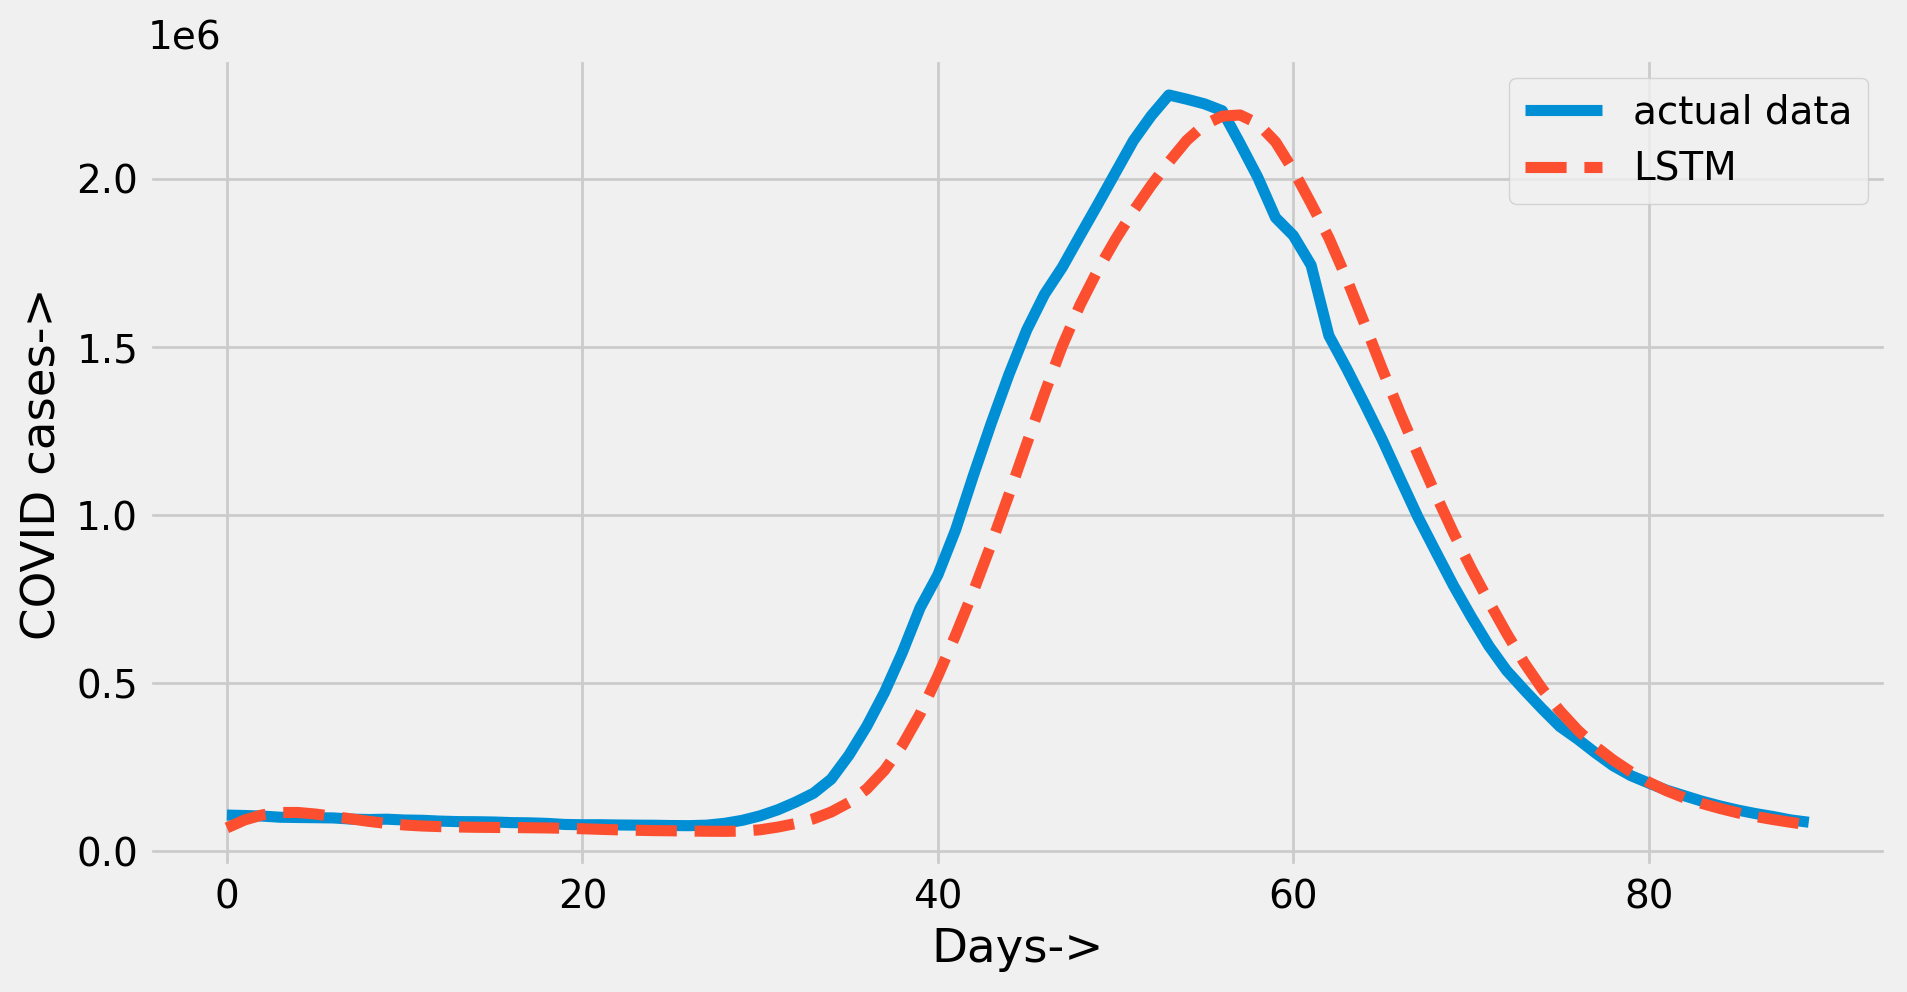

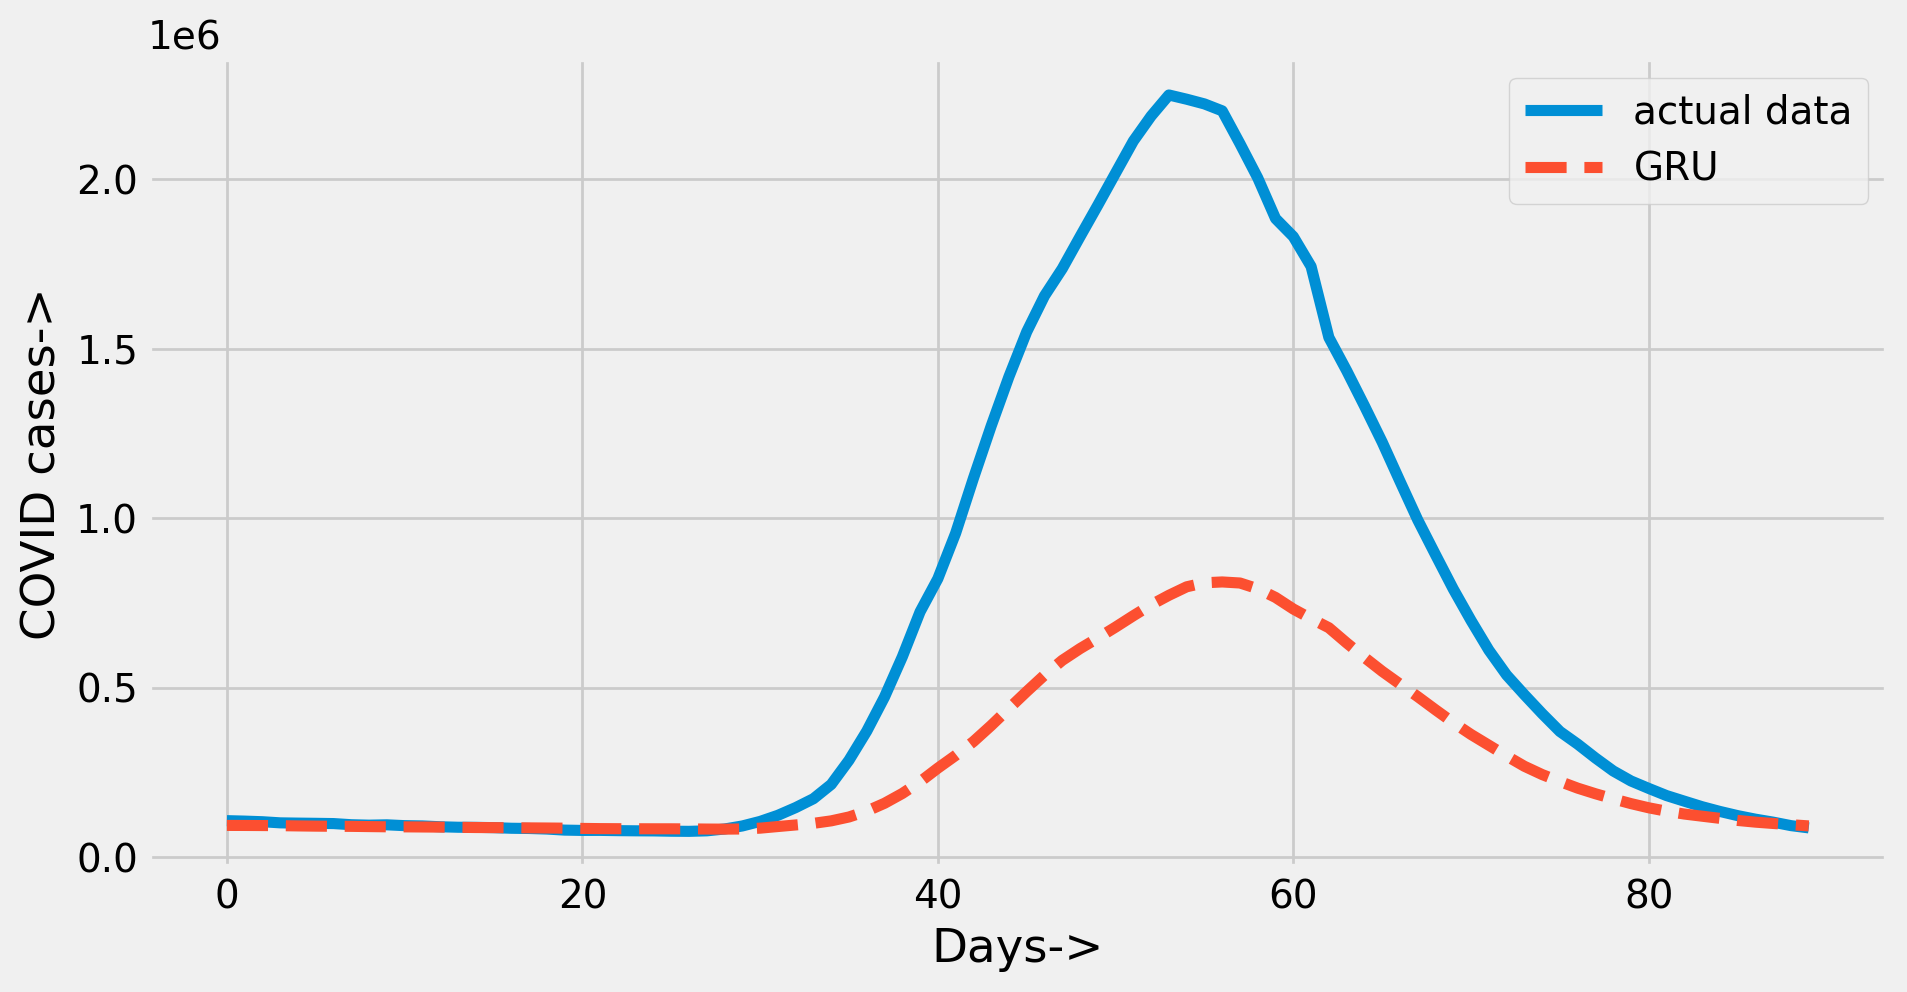

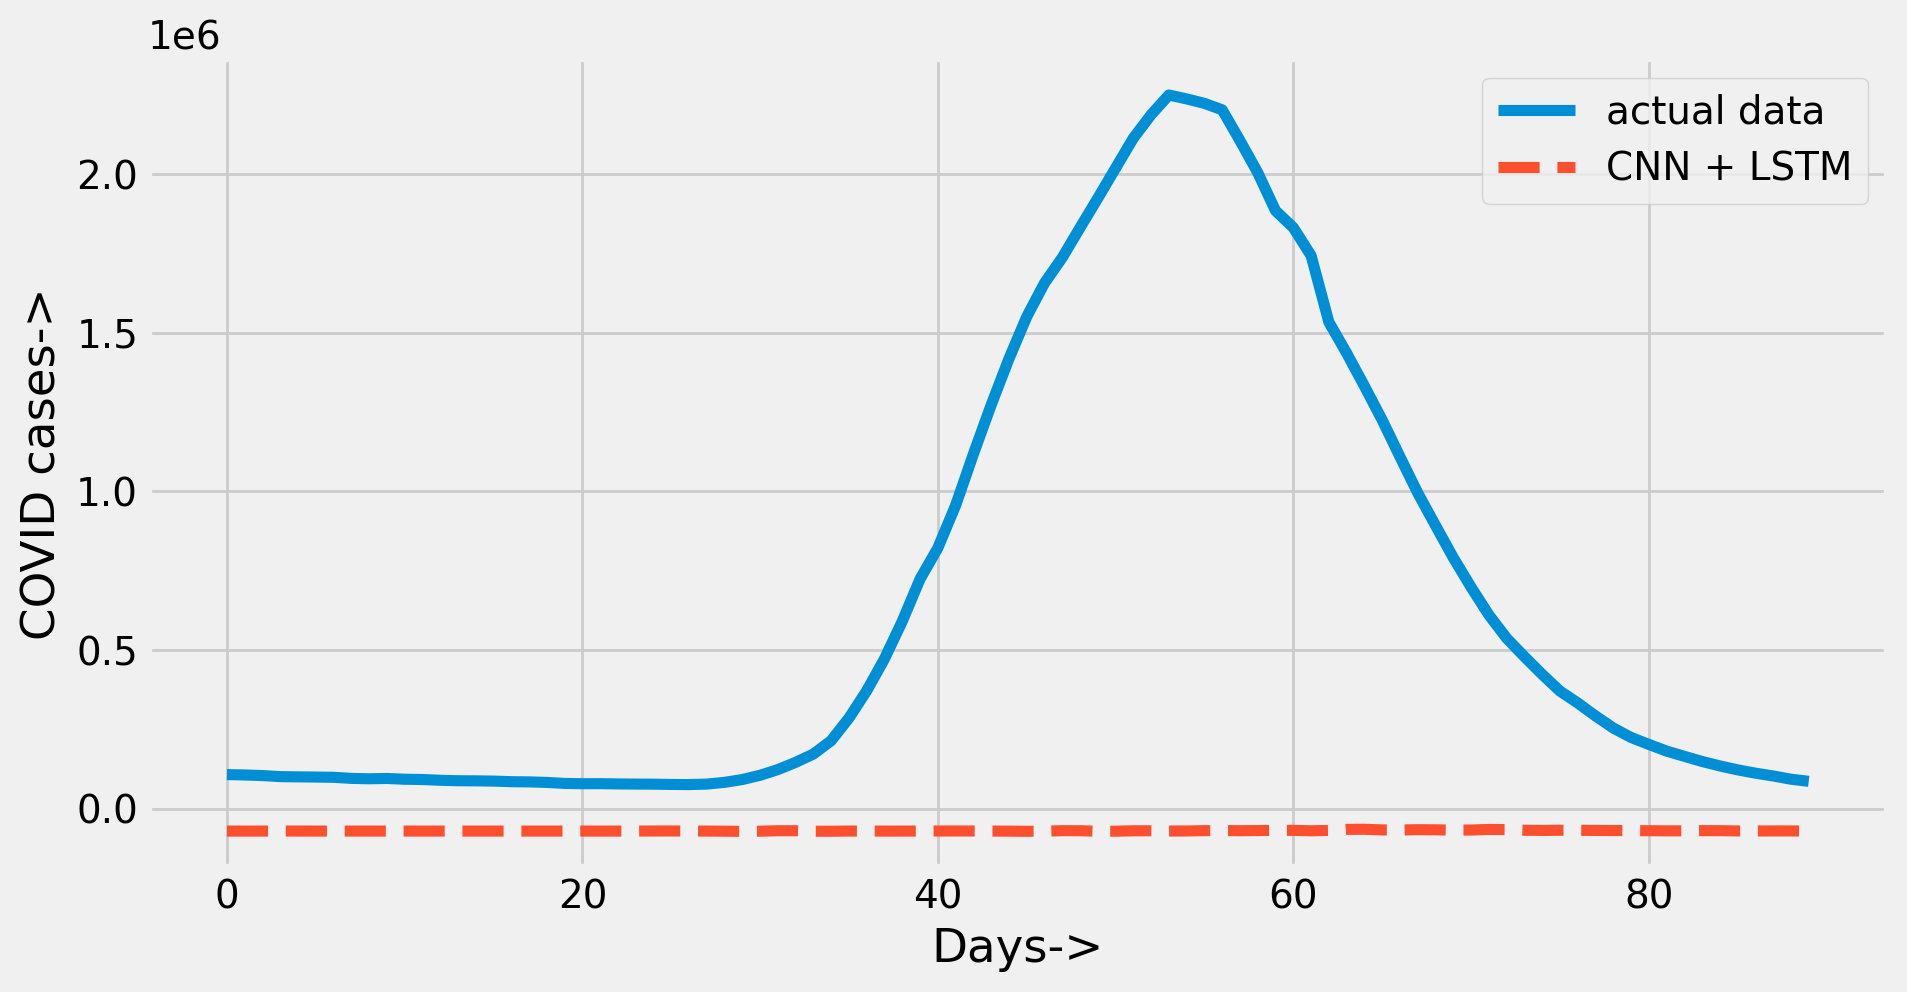

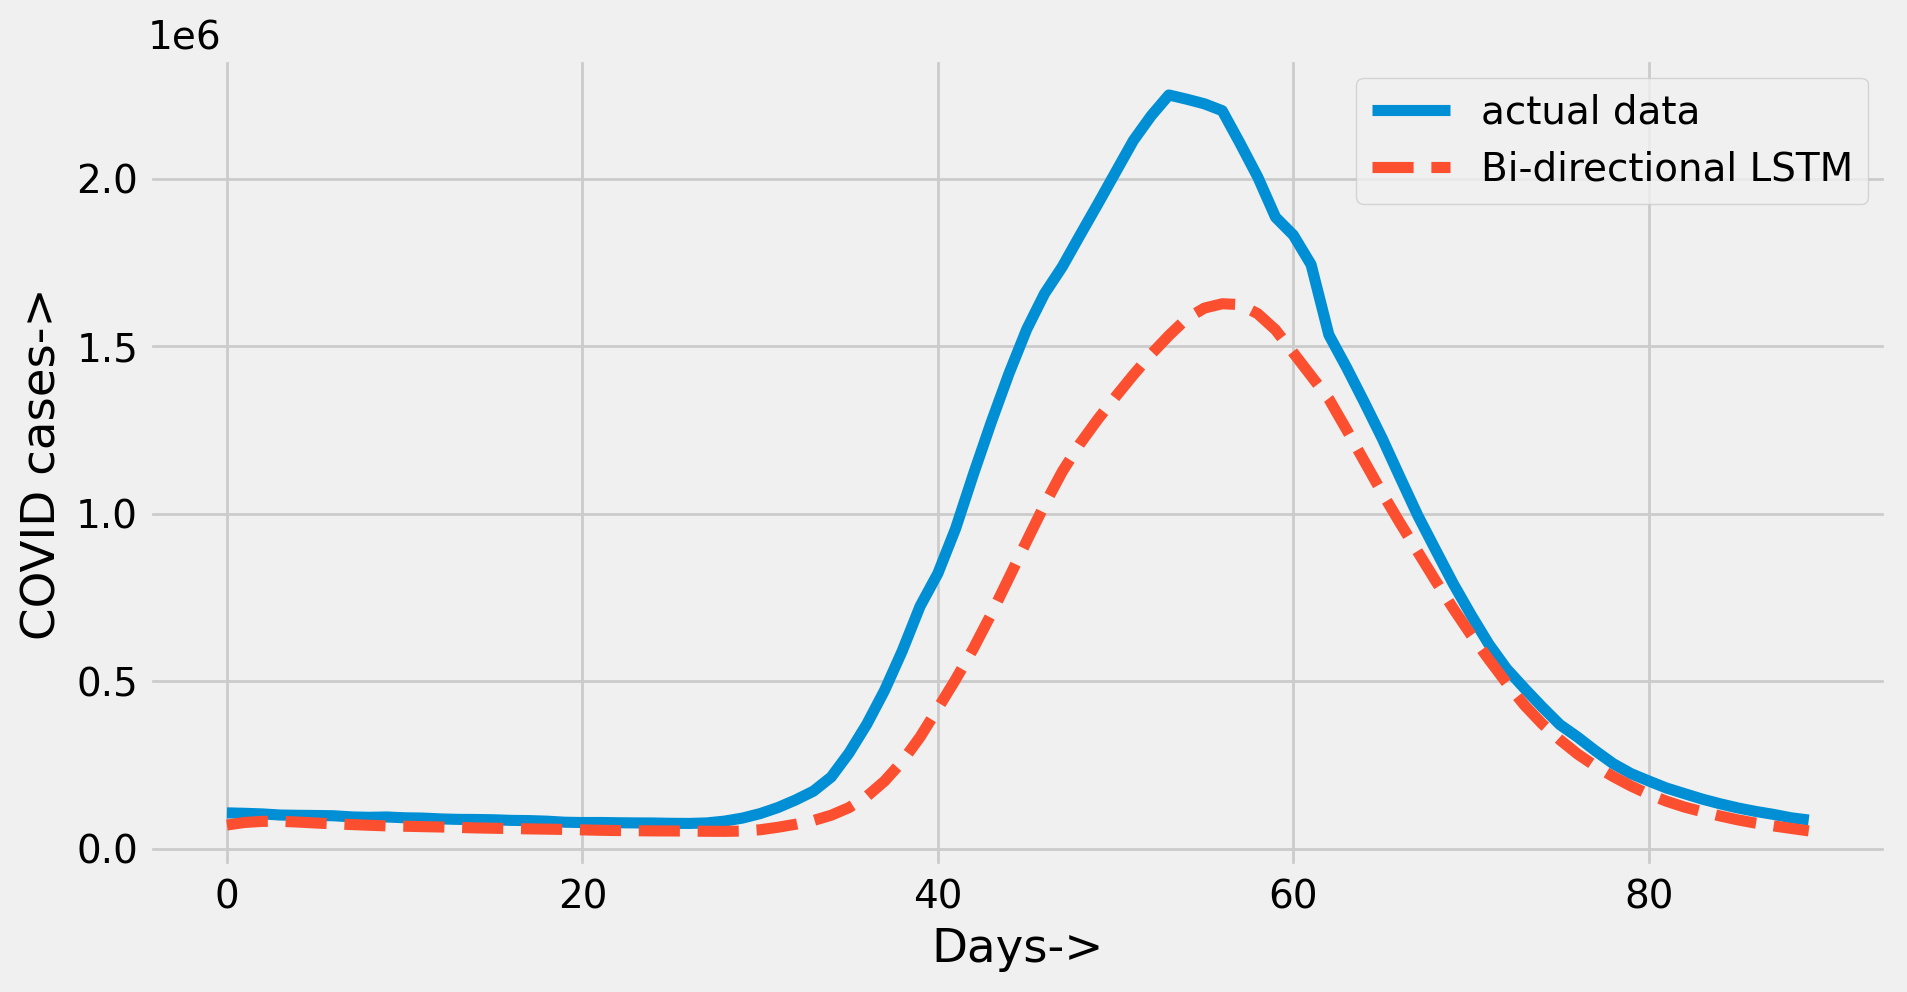

In [295]:

for name, model in dict_models.items():
    print(name)
                                                                  
    y_predicted_models[name] = model.predict(test_generator)
    y_test_exp = (y_predicted_models[name]) * (max(y_test) - min(y_test))+ min(y_test)
    y_pred_final = np.array(y_test_exp).reshape(-1)+ np.array(y_pred_linear[50:]).reshape(-1)
    
    y_pred_final_norm = (y_pred_final-min(y_pred_final))/(max(y_pred_final) - min(y_pred_final))
    evaluation_dict[name] = ModelEvaluation(y_pred_final_norm, y_test_x[50:], model_name = name)
    
    print(evaluation_dict[name])
                                                                  
    loss_dict[name] = mse_metric(np.array(y_test)[50:], y_pred_final, name)
    
    cnt += 1

In [397]:
print(loss_dict)

{'LSTM': 0.004715181945165285, 'GRU': 0.08238853314930329, 'CNN + LSTM': 0.22864902596998754, 'Bi-directional LSTM': 0.01835288697525661}


In [297]:
model = Bi_LSTM(shape =[ window_size,1])

In [298]:
model.compile(optimizer = "adam",loss= "mse")

In [299]:
history=model.fit(t_generator,verbose=2, epochs = 100)

Epoch 1/100
8/8 - 26s - loss: 0.0203 - 26s/epoch - 3s/step
Epoch 2/100
8/8 - 18s - loss: 0.0495 - 18s/epoch - 2s/step
Epoch 3/100
8/8 - 19s - loss: 0.0196 - 19s/epoch - 2s/step
Epoch 4/100
8/8 - 16s - loss: 0.0502 - 16s/epoch - 2s/step
Epoch 5/100
8/8 - 17s - loss: 0.0378 - 17s/epoch - 2s/step
Epoch 6/100
8/8 - 17s - loss: 0.0257 - 17s/epoch - 2s/step
Epoch 7/100
8/8 - 17s - loss: 0.0570 - 17s/epoch - 2s/step
Epoch 8/100
8/8 - 18s - loss: 0.0415 - 18s/epoch - 2s/step
Epoch 9/100
8/8 - 19s - loss: 0.0427 - 19s/epoch - 2s/step
Epoch 10/100
8/8 - 18s - loss: 0.0096 - 18s/epoch - 2s/step
Epoch 11/100
8/8 - 20s - loss: 0.0085 - 20s/epoch - 2s/step
Epoch 12/100
8/8 - 18s - loss: 0.0084 - 18s/epoch - 2s/step
Epoch 13/100
8/8 - 16s - loss: 0.0185 - 16s/epoch - 2s/step
Epoch 14/100
8/8 - 17s - loss: 0.0102 - 17s/epoch - 2s/step
Epoch 15/100
8/8 - 17s - loss: 0.0071 - 17s/epoch - 2s/step
Epoch 16/100
8/8 - 16s - loss: 0.0126 - 16s/epoch - 2s/step
Epoch 17/100
8/8 - 16s - loss: 0.0018 - 16s/epoch

In [300]:
y_predicted = model.predict(test_generator)

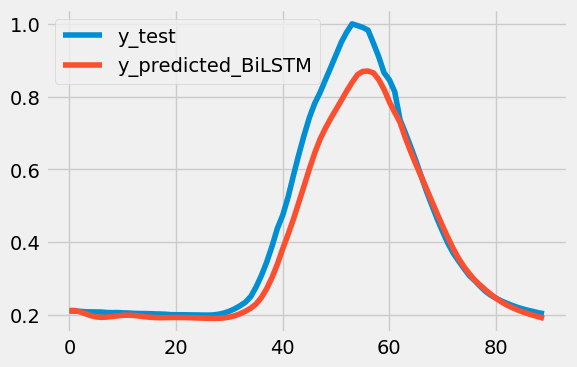

In [362]:
plt.rcParams['figure.dpi'] = 100
plt.plot(y_test_x[50:])
plt.plot(y_predicted, '-')
plt.legend(["y_test","y_predicted_BiLSTM"])


Text(0.5, 0, 'Days')

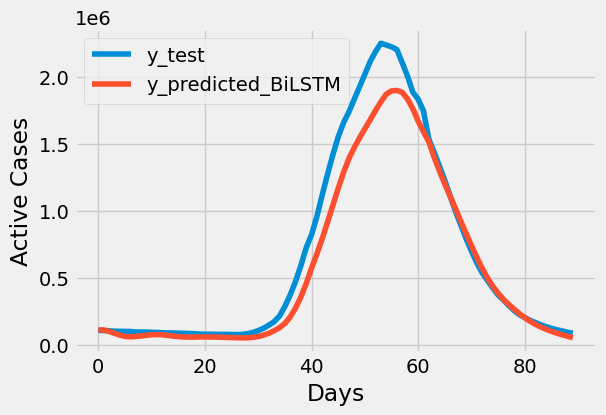

In [387]:
y_test_exp = (y_predicted) * (max(y_test) - min(y_test))+ min(y_test)
plt.plot(np.array(y_test)[50:])
plt.plot(y_test_exp)
plt.legend(["y_test","y_predicted_BiLSTM"])
plt.ylabel("Active Cases")
plt.xlabel("Days")

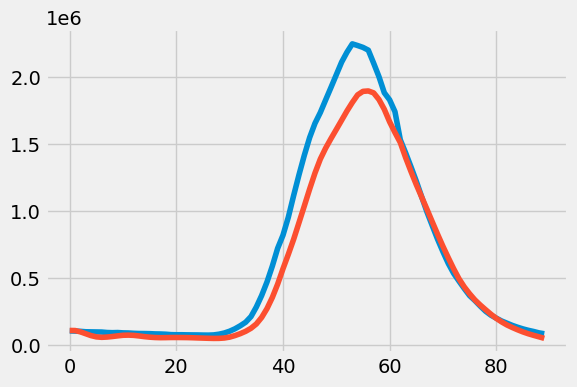

In [365]:
y_pred_final = np.array(y_test_exp).reshape(-1)+ np.array(y_pred_linear[50:]).reshape(-1)
plt.plot(np.array(y_test)[50:])
plt.plot(y_pred_final)

0.006302830844051319

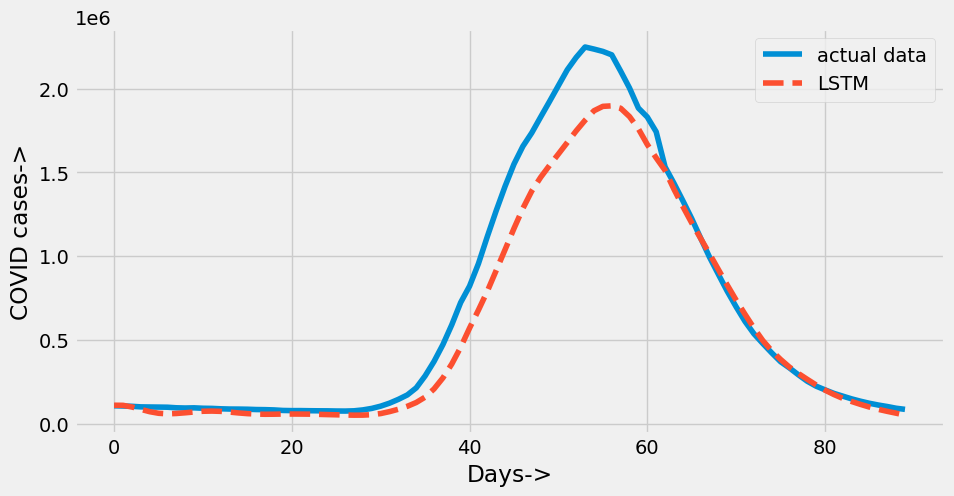

In [366]:
mse_metric(np.array(y_test)[50:], y_pred_final, "LSTM")

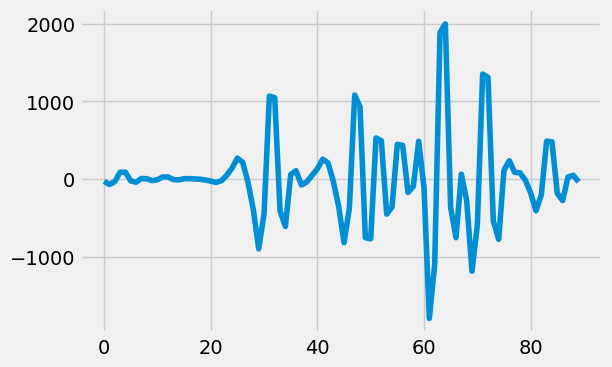

In [367]:
plt.plot(y_pred_linear[50:])

In [368]:
def ModelEvaluation(index_predict, index_real, model_name='model'): 
    
    '''
    ModelEvaluation: The function used to evaluate prediction model
    
    index_predict: The predict sequence
    
    index_real: The actual sequence 
    
    modelname: For the displaying convenience, the name of index
    
    '''
    
    model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # The evaluation model list
    model_metrics_list = []  # The evaluation indicatiors list
    
    
    for m in model_metrics_name:  
        tmp_score = m(index_predict, index_real)  # compute each result
        model_metrics_list.append(tmp_score)
    df = pd.DataFrame(np.array([model_metrics_list]), index=[model_name], columns=['ev', 'mae', 'mse', 'r2'])
    
    
    return df

In [369]:
y_pred_final_norm = (y_pred_final-min(y_pred_final))/(max(y_pred_final) - min(y_pred_final))

In [ ]:
ModelEvaluation(y_pred_final_norm,y_test_x[50:],model_name = "Bi Directional LSTM")

In [372]:
model_lstm = LSTM_x(shape=[window_size,1])

In [373]:
model_lstm.compile(optimizer = "adam",loss= "mse")

In [375]:
history=model_lstm.fit(t_generator,verbose=2, epochs = 100)

Epoch 1/100
8/8 - 12s - loss: 0.0777 - 12s/epoch - 2s/step
Epoch 2/100
8/8 - 6s - loss: 0.0373 - 6s/epoch - 800ms/step
Epoch 3/100
8/8 - 6s - loss: 0.0247 - 6s/epoch - 789ms/step
Epoch 4/100
8/8 - 7s - loss: 0.0189 - 7s/epoch - 821ms/step
Epoch 5/100
8/8 - 7s - loss: 0.0258 - 7s/epoch - 853ms/step
Epoch 6/100
8/8 - 7s - loss: 0.0307 - 7s/epoch - 843ms/step
Epoch 7/100
8/8 - 7s - loss: 0.0125 - 7s/epoch - 825ms/step
Epoch 8/100
8/8 - 6s - loss: 0.0057 - 6s/epoch - 805ms/step
Epoch 9/100
8/8 - 6s - loss: 0.0090 - 6s/epoch - 791ms/step
Epoch 10/100
8/8 - 6s - loss: 0.0094 - 6s/epoch - 791ms/step
Epoch 11/100
8/8 - 7s - loss: 0.0260 - 7s/epoch - 915ms/step
Epoch 12/100
8/8 - 7s - loss: 0.0146 - 7s/epoch - 856ms/step
Epoch 13/100
8/8 - 7s - loss: 0.0104 - 7s/epoch - 844ms/step
Epoch 14/100
8/8 - 7s - loss: 0.0107 - 7s/epoch - 825ms/step
Epoch 15/100
8/8 - 6s - loss: 0.0016 - 6s/epoch - 790ms/step
Epoch 16/100
8/8 - 6s - loss: 0.0023 - 6s/epoch - 776ms/step
Epoch 17/100
8/8 - 6s - loss: 0.00

In [376]:
y_predicted_lstm = model_lstm.predict(test_generator)

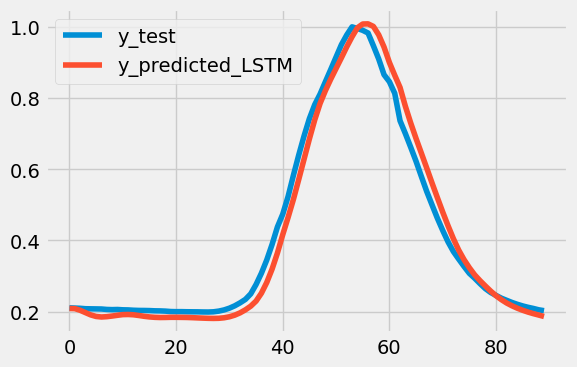

In [377]:

plt.plot(y_test_x[50:])
plt.plot(y_predicted_lstm, '-')
plt.legend(["y_test","y_predicted_LSTM"])

Text(0.5, 0, 'Days')

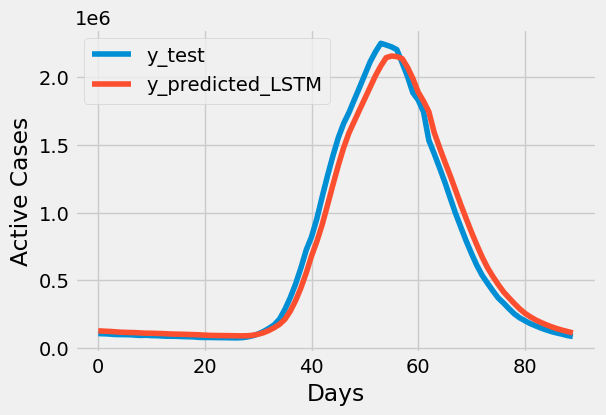

In [386]:
y_test_exp = (y_predicted_lstm) * (max(y_test) - min(y_test))+ min(y_test)
plt.plot(np.array(y_test)[50:])
plt.plot(y_test_exp)
plt.legend(["y_test","y_predicted_LSTM"])
plt.ylabel("Active Cases")
plt.xlabel("Days")

In [379]:
y_pred_final_norm_lstm = (y_pred_final-min(y_pred_final))/(max(y_pred_final) - min(y_pred_final))

In [388]:
ModelEvaluation(y_pred_final_norm_lstm,y_test_x[50:],model_name = "LSTM")

,ev,mae,mse,r2
LSTM,0.940592,0.145417,0.026029,0.778321


In [391]:
model_gru = GRU_x(shape=[window_size,1])

In [392]:
model_gru.compile(optimizer = "adam",loss= "mse")

In [383]:
history_gru = model_gru.fit(t_generator,verbose=2, epochs = 100)

Epoch 1/100
8/8 - 12s - loss: 0.0638 - 12s/epoch - 1s/step
Epoch 2/100
8/8 - 6s - loss: 0.0573 - 6s/epoch - 744ms/step
Epoch 3/100
8/8 - 6s - loss: 0.0161 - 6s/epoch - 705ms/step
Epoch 4/100
8/8 - 6s - loss: 0.0907 - 6s/epoch - 693ms/step
Epoch 5/100
8/8 - 6s - loss: 0.0518 - 6s/epoch - 706ms/step
Epoch 6/100
8/8 - 6s - loss: 0.0433 - 6s/epoch - 713ms/step
Epoch 7/100
8/8 - 6s - loss: 0.0350 - 6s/epoch - 713ms/step
Epoch 8/100
8/8 - 5s - loss: 0.0208 - 5s/epoch - 671ms/step
Epoch 9/100
8/8 - 5s - loss: 0.0145 - 5s/epoch - 647ms/step
Epoch 10/100
8/8 - 6s - loss: 0.0329 - 6s/epoch - 720ms/step
Epoch 11/100
8/8 - 6s - loss: 0.0379 - 6s/epoch - 732ms/step
Epoch 12/100
8/8 - 6s - loss: 0.0224 - 6s/epoch - 729ms/step
Epoch 13/100
8/8 - 6s - loss: 0.0047 - 6s/epoch - 699ms/step
Epoch 14/100
8/8 - 6s - loss: 0.0082 - 6s/epoch - 711ms/step
Epoch 15/100
8/8 - 5s - loss: 0.0235 - 5s/epoch - 674ms/step
Epoch 16/100
8/8 - 6s - loss: 0.0185 - 6s/epoch - 692ms/step
Epoch 17/100
8/8 - 6s - loss: 0.00

In [389]:
y_predicted_gru = model_gru.predict(test_generator)

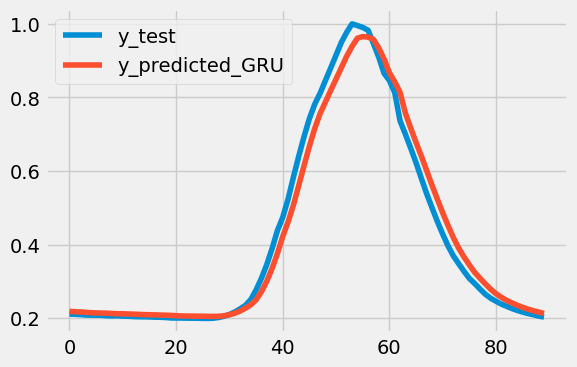

In [390]:

plt.plot(y_test_x[50:])
plt.plot(y_predicted_gru, '-')
plt.legend(["y_test","y_predicted_GRU"])

Text(0.5, 0, 'Days')

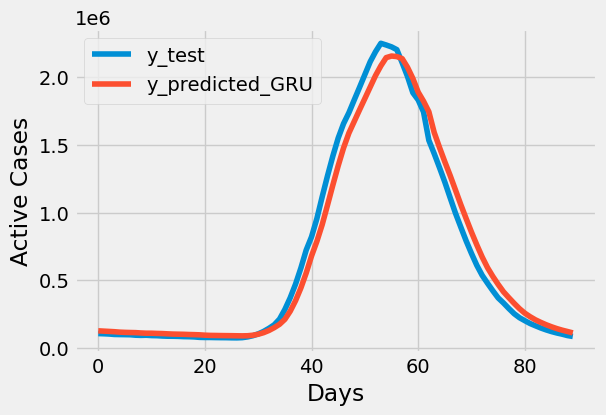

In [393]:
y_test_exp = (y_predicted_gru) * (max(y_test) - min(y_test))+ min(y_test)
plt.plot(np.array(y_test)[50:])
plt.plot(y_test_exp)
plt.legend(["y_test","y_predicted_GRU"])
plt.ylabel("Active Cases")
plt.xlabel("Days")

In [394]:
y_pred_final_norm_gru = (y_pred_final-min(y_pred_final))/(max(y_pred_final) - min(y_pred_final))

In [396]:
ModelEvaluation(y_pred_final_norm_gru,y_test_x[50:],model_name = "GRU")

,ev,mae,mse,r2
GRU,0.940592,0.145417,0.026029,0.778321
